<h1 style="text-align: center; color: #0066CC;">About dataset</h1>


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

[Dataset link](https://www.kaggle.com/datasets/uciml/iris)

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

<h2 style="text-align: center; color: #0066CC;">Aims and objective of project</h2>

#### Introduction

The aim of this project is to demonstrate the process of building and evaluating various machine learning models used for classification. We start with exploratory data analysis (EDA) to better understand the data we will be working with. Next, we implement different classification models and evaluate their effectiveness.

#### Project Steps

1. **Importing Libraries and Initial Data Exploration**


2. **Exploratory Data Analysis (EDA)**

    
3. **Classification Models**:
    - **Logistic Regression**: A linear model used to predict a binary variable.
    - **K-Nearest Neighbors (K-NN)**: A model based on nearest neighbors that classifies data based on the labels of the closest data points.
    - **Support Vector Machine (SVM)**: A model that finds a hyperplane maximizing the margin between classes.
    - **Kernel SVM**: A variant of SVM that uses kernel functions to handle nonlinear problems.
    - **Naive Bayes**: A probabilistic model based on Bayes' theorem with the assumption of independence between features.
    - **Decision Tree**: A decision model that splits data based on features, creating a tree structure.
    - **Random Forest Classification**: An ensemble model based on multiple decision trees that increases accuracy and reduces overfitting.
    

4. **Model Evaluation**:
    - Assessing the performance of models using various metrics (e.g., accuracy, precision, recall, F1-score).
    - Comparing results and selecting the best model for the given problem.

#### Summary

At the end of the notebook, we summarize the results of the various classification models to determine which one is best suited for the given problem. By using different evaluation metrics, we can choose a model that not only achieves the highest accuracy but also handles other aspects of classification well, such as precision and recall.

Throughout the process, we emphasize transparency and reproducibility so that each step is understandable and easy to replicate by other users.

<h1 style="text-align: center; color: #0066CC;">Importing Libraries and Initial Data Exploration</h1>


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Exploring Data

### Load data

In [2]:
dataset = pd.read_csv("/kaggle/input/iris/Iris.csv")
dataset.drop(columns=['Id'],inplace=True)

### Head of data

In [3]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data preprocessing

### Shape of data

In [4]:
print(f"Iris flower data: \nThere is {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Iris flower data: 
There is 150 rows and 5 columns.


### Empty fields

In [5]:
#Checking for empty fields.
if dataset.isnull().any().any():
    df_null = dataset.isnull().sum().sum()
    print(f"There are empty fields in the dataset. Null Count in Data: {df_null}")
else:
    print("There are no empty fields in the dataset.")

There are no empty fields in the dataset.


### Duplicated fields

In [6]:
# Duplicate rows in train_data
data_duplicates = dataset.duplicated()
sum_data_duplicates = dataset.duplicated().sum()

### Info of the data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h3 style="text-align: center; color: #0066CC;">Observations</h3>

Our dataset contains 150 rows and 6 columns. To simplify the data analysis and the project, I renamed the ID column to "ID" in the dataset. There are no empty fields, a few duplicates, but this is acceptable in this case. We have 4 numerical feature columns and one categorical (label) column, which contains 3 categories: Iris-setosa, Iris-versicolor, and Iris-virginica.

<h1 style="text-align: center; color: #0066CC;">Exploratory Data Analysis (EDA)</h1>


## Descriptive statistic of features (numerical values)


In [8]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

1. **Sepal Length (cm)**:
   - The average sepal length is approximately **5.84 cm**, with a standard deviation of **0.83 cm**, indicating moderate variation among the measurements.
   - The sepal length ranges from a minimum of **4.30 cm** to a maximum of **7.90 cm**, showing a wide spread in the size of the sepals across the dataset.
   - The median sepal length is **5.80 cm**, which is close to the mean, suggesting that the distribution of sepal lengths is relatively symmetrical.
   

2. **Sepal Width (cm)**:
   - The average sepal width is about **3.05 cm**, with a standard deviation of **0.43 cm**, reflecting less variability compared to sepal length.
   - Sepal width values range from **2.00 cm** to **4.40 cm**, which indicates a moderate spread.
   - The median sepal width of **3.00 cm** is slightly less than the mean, suggesting a slight skew towards smaller widths.
   

3. **Petal Length (cm)**:
   - The average petal length is **3.76 cm**, with a high standard deviation of **1.76 cm**, indicating considerable variation in petal lengths.
   - The petal length varies from **1.00 cm** to **6.90 cm**, showing a very broad range of petal sizes.
   - The median petal length is **4.35 cm**, which is higher than the mean, indicating a right-skewed distribution where a significant number of petals are longer.
   

4. **Petal Width (cm)**:
   - The average petal width is **1.20 cm**, with a standard deviation of **0.76 cm**, suggesting a moderate level of variation in petal width.
   - Petal width ranges from **0.10 cm** to **2.50 cm**, with a notable spread, indicating diversity in the petal width measurements.
   - The median petal width of **1.30 cm** is slightly greater than the mean, which might indicate a right-skewed distribution, similar to petal length.

## Feature distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

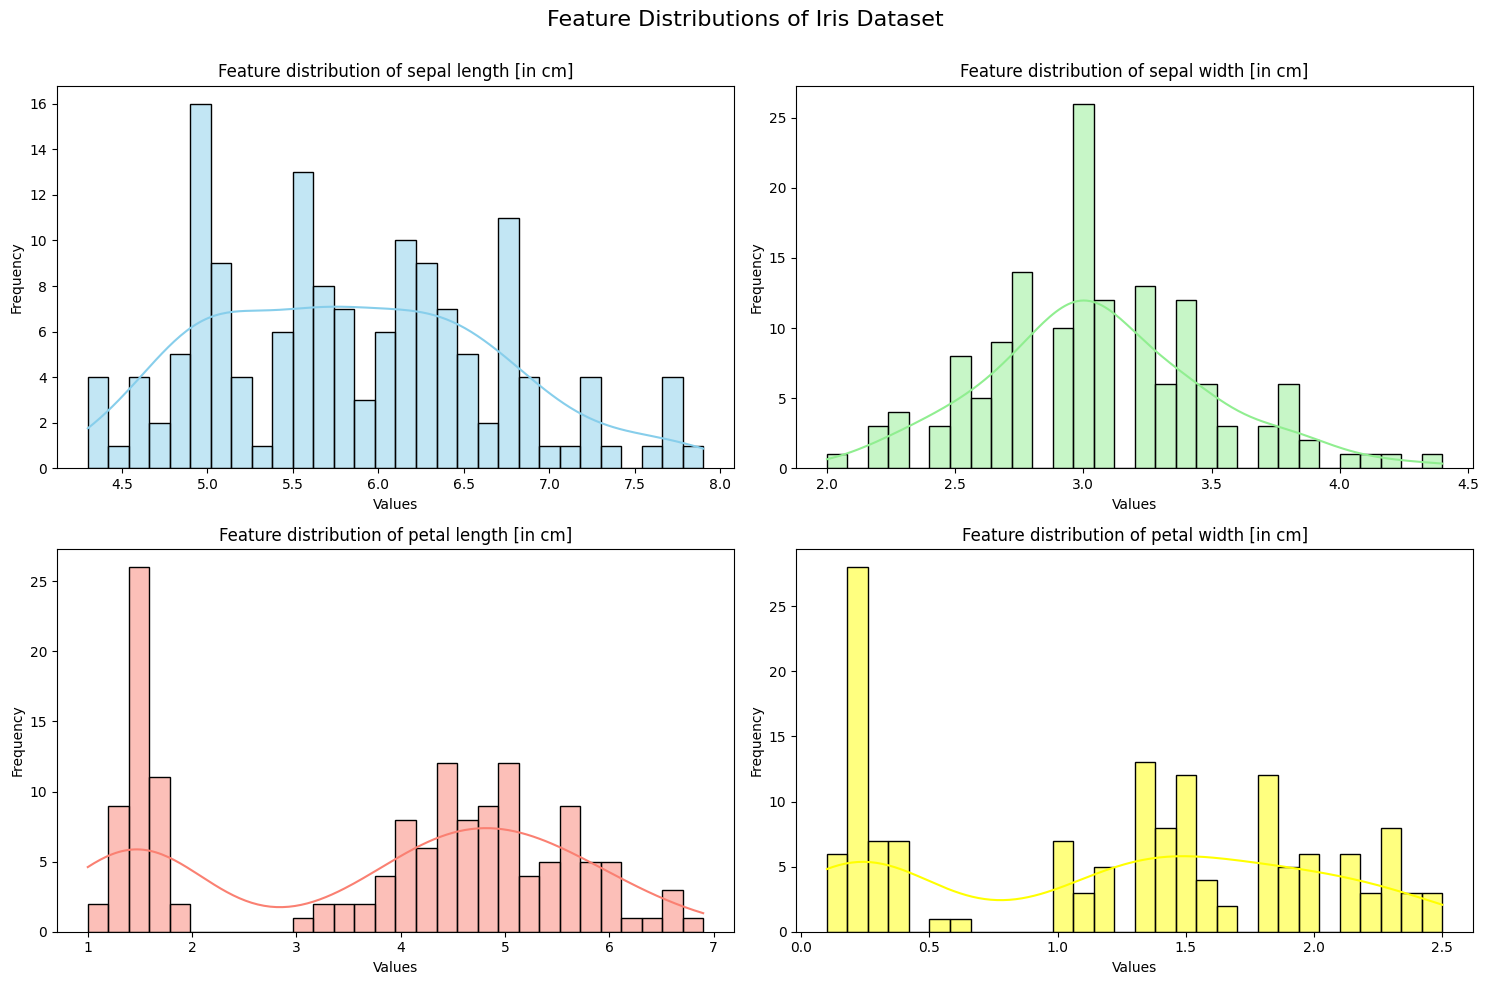

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Sepal Length
sns.histplot(dataset['SepalLengthCm'], bins=30, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Feature distribution of sepal length [in cm]')

# Sepal Width
sns.histplot(dataset['SepalWidthCm'], bins=30, kde=True, color='lightgreen', ax=axs[0, 1])
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Feature distribution of sepal width [in cm]')

# Petal Length
sns.histplot(dataset['PetalLengthCm'], bins=30, kde=True, color='salmon', ax=axs[1, 0])
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Feature distribution of petal length [in cm]')

# Petal Width
sns.histplot(dataset['PetalWidthCm'], bins=30, kde=True, color='yellow', ax=axs[1, 1])
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Feature distribution of petal width [in cm]')

fig.suptitle('Feature Distributions of Iris Dataset\n', fontsize=16)
plt.tight_layout()
plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>
The dataset contains four features: sepal length, sepal width, petal length, and petal width.

* **Sepal length** is unimodal and skewed to the right. The most frequent sepal length is 5.0 cm.
* **Sepal width** is also unimodal but not skewed. The most frequent sepal width is 3.0 cm.
* **Petal length** and **petal width** are both bimodal and skewed to the right. The most frequent petal length is 1.5 cm, and the most frequent petal width is 0.2 cm.

Overall, the distributions of the features are quite varied, suggesting that the dataset may contain a variety of different types of flowers.

## Feature boxplots

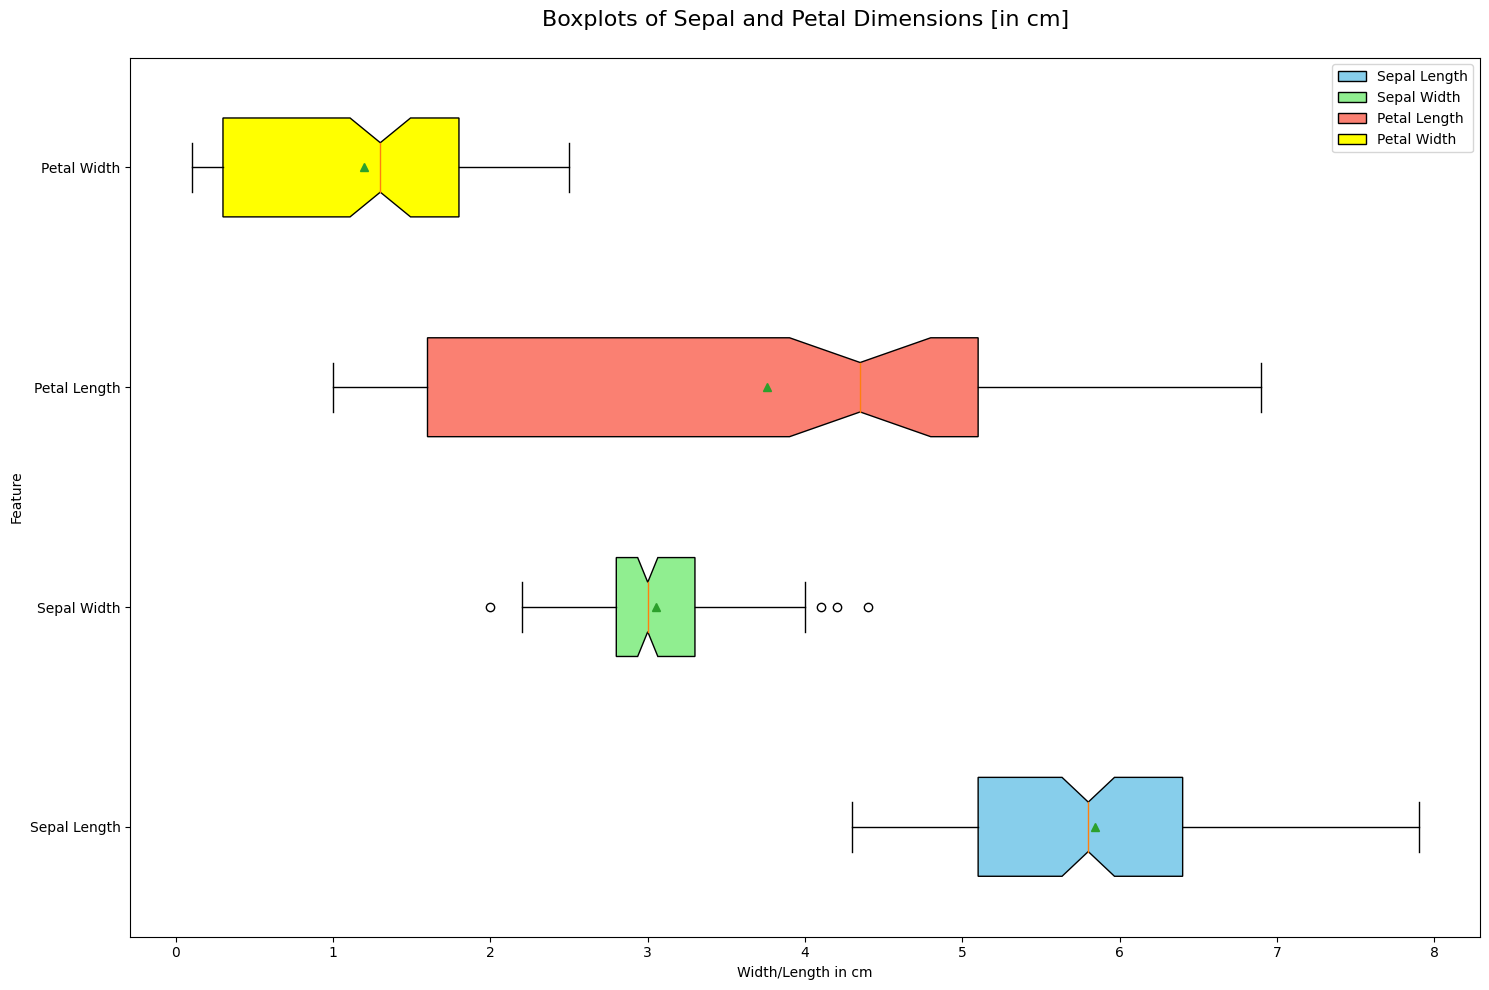

In [10]:
feature_in_cm = [dataset['SepalLengthCm'], dataset['SepalWidthCm'], dataset['PetalLengthCm'], dataset['PetalWidthCm']]
labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
colors = ['skyblue', 'lightgreen', 'salmon', 'yellow']

fig, axs = plt.subplots(1, 1, figsize=(15, 10))

bplot = axs.boxplot(
    feature_in_cm,
    patch_artist=True,  
    notch=True,        
    showmeans=True,    
    vert=False,        
    labels=labels      
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axs.set_xlabel('Width/Length in cm')
axs.set_ylabel('Feature')
axs.set_title('Boxplots of Sepal and Petal Dimensions [in cm]\n', fontsize=16)

axs.legend(
    [bplot["boxes"][i] for i in range(len(labels))],
    labels, 
    loc='best'
)

plt.tight_layout()

plt.show()

<h3 style="text-align: center; color: #0066CC;">Observations</h3>

From above visualization, we can see that **SepalWidthCm** contains some outliers, and other all are perfectly fine.



## Feature correlation

In [11]:
Corr_Matrix = round(dataset.iloc[:,:-1].corr(), 2)
print(Corr_Matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm           1.00         -0.11           0.87          0.82
SepalWidthCm           -0.11          1.00          -0.42         -0.36
PetalLengthCm           0.87         -0.42           1.00          0.96
PetalWidthCm            0.82         -0.36           0.96          1.00


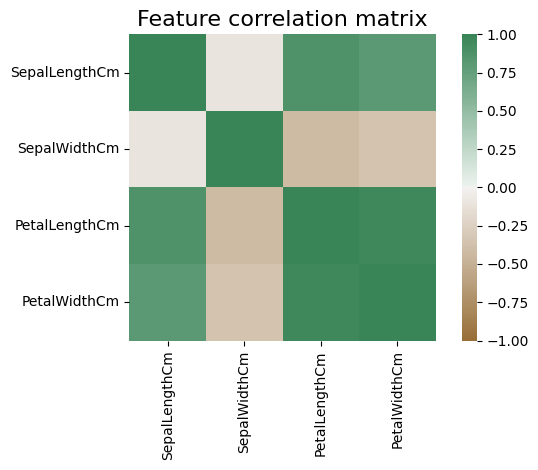

In [12]:
dataset_correlation = dataset.iloc[:,:-1].corr()

axis_corr = sns.heatmap(
dataset_correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.title('Feature correlation matrix', fontsize=16)

plt.tight_layout()

plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

* **Sepal Length** vs **Sepal Width** - Very weak negative correlation. Sepal length and width are almost independent of each other. **(-0.11)**
* **Sepal Length** vs **PetalLengthCm** - Strong positive correlation. Longer petals are associated with longer sepals. **(0.87)**
* **Sepal Length** vs **PetalWidthCm** - Strong positive correlation. Wider petals are associated with longer sepals. **(0.82)**
* **SepalWidthCm** vs **PetalLengthCm** - Moderate negative correlation. Longer petals tend to be associated with narrower sepals. **(-0.42)**
* **SepalWidthCm** vs **PetalWidthCm** - Moderate negative correlation. Wider petals are somewhat associated with narrower sepals. **(-0.36)**
* **PetalLengthCm** vs **PetalWidthCm** - Very strong positive correlation. Longers petals are associated with wider petals. **(0.96)**


These correlations suggest that petal dimensions are strongly related to each other and also to sepal length, but sepal width shows weaker and more variable relationships.

## Descriptive statistic of labels (Iris species)

In [13]:
search_phrases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
count_iris_setosa = dataset['Species'].str.contains(search_phrases[0], case=False).sum()
count_iris_versicolor = dataset['Species'].str.contains(search_phrases[1], case=False).sum()
count_iris_virginica = dataset['Species'].str.contains(search_phrases[2], case=False).sum()

print(f"The data contains {count_iris_setosa} observations of Iris Setosa species, {count_iris_versicolor} observations of Iris Versicolor, and {count_iris_virginica} observations of Iris Virginica.")

The data contains 50 observations of Iris Setosa species, 50 observations of Iris Versicolor, and 50 observations of Iris Virginica.


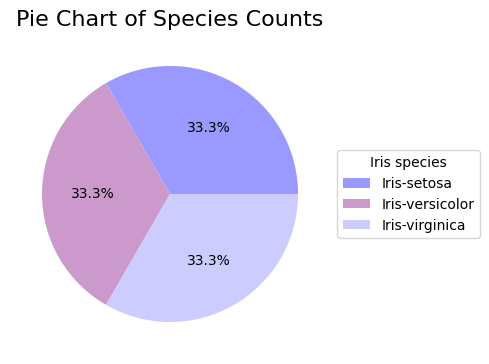

In [14]:
labels = search_phrases
sizes = [count_iris_setosa, count_iris_versicolor, count_iris_virginica]

fig, ax = plt.subplots(figsize=(5, 10))

wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', colors=['#9999FF', '#CC99CC', '#CCCCFF'])
ax.legend(wedges, labels, title="Iris species", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title ('Pie Chart of Species Counts', fontsize=16)

plt.tight_layout()

plt.show()

### SepalLenghtCm vs Species

In [15]:
describe_sepal_lenghts_species = dataset.groupby('Species')['SepalLengthCm']
describe_sepal_lenghts_species.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


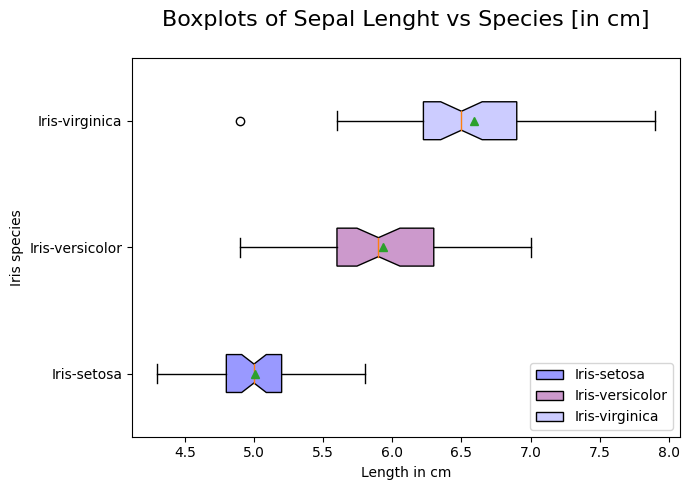

In [16]:
sepal_lenght_in_cm = [dataset[dataset['Species'] == 'Iris-setosa']['SepalLengthCm'], dataset[dataset['Species'] == 'Iris-versicolor']['SepalLengthCm'], dataset[dataset['Species'] == 'Iris-virginica']['SepalLengthCm']]

labels = search_phrases
colors = ['#9999FF', '#CC99CC', '#CCCCFF']

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

bplot = axs.boxplot(
    sepal_lenght_in_cm,
    patch_artist=True,  
    notch=True,        
    showmeans=True,    
    vert=False,        
    labels=labels      
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axs.set_xlabel('Length in cm')
axs.set_ylabel('Iris species')
axs.set_title('Boxplots of Sepal Lenght vs Species [in cm]\n', fontsize=16)

axs.legend(
    [bplot["boxes"][i] for i in range(len(labels))],
    labels, 
    loc='best'
)

plt.tight_layout()

plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

The analysis of sepal length for the three iris species reveals clear differences. 

**Iris-virginica** has the highest average sepal length at **6.588 cm**, compared to **Iris-versicolor** at **5.936 cm** and **Iris-setosa** at **5.006 cm**.

**Range of sepal lengths:**

* **Iris-setosa:** 4.3 cm – 5.8 cm
* **Iris-versicolor:** 4.9 cm – 7.0 cm
* **Iris-virginica:** 4.9 cm – 7.9 cm

**Variability:**

**Iris-virginica** has the greatest standard deviation of **0.636 cm**, indicating the highest variability.
**Iris-setosa** has the smallest standard deviation of **0.352 cm**, indicating the lowest variability.
**Iris-versicolor** shows a standard deviation of **0.516 cm** and has an outlier minimum value visible on the plot, affecting the sepal length distribution for this species.

In summary, **Iris-virginica** stands out with the highest average sepal length and greatest variability, while **Iris-setosa** has the lowest variability. **Iris-versicolor** is intermediate, with an additional outlier minimum value.

### SepalWidthCm vs Species

In [17]:
describe_sepal_lenghts_species = dataset.groupby('Species')['SepalWidthCm']
describe_sepal_lenghts_species.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


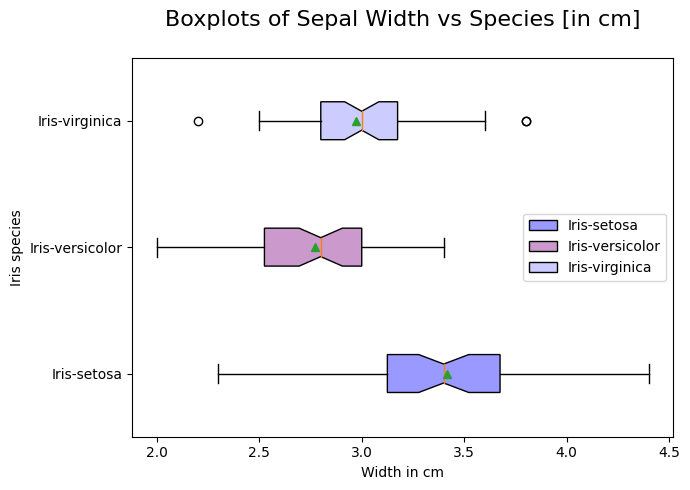

In [18]:
sepal_width_in_cm = [dataset[dataset['Species'] == 'Iris-setosa']['SepalWidthCm'], dataset[dataset['Species'] == 'Iris-versicolor']['SepalWidthCm'], dataset[dataset['Species'] == 'Iris-virginica']['SepalWidthCm']]

labels = search_phrases
colors = ['#9999FF', '#CC99CC', '#CCCCFF']

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

bplot = axs.boxplot(
    sepal_width_in_cm,
    patch_artist=True,  
    notch=True,        
    showmeans=True,    
    vert=False,        
    labels=labels      
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axs.set_xlabel('Width in cm')
axs.set_ylabel('Iris species')
axs.set_title('Boxplots of Sepal Width vs Species [in cm]\n', fontsize=16)

axs.legend(
    [bplot["boxes"][i] for i in range(len(labels))],
    labels, 
    loc='best'
)

plt.tight_layout()

plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

The analysis of sepal width for the three iris species reveals clear differences.

**Iris-setosa** has the highest average sepal width at **3.418 cm**, compared to **Iris-virginica** at **2.974 cm** and **Iris-versicolor** at **2.770 cm**.

**Range of sepal widths:**

* **Iris-setosa:** 2.3 cm – 4.4 cm
* **Iris-versicolor:** 2.0 cm – 3.4 cm
* **Iris-virginica:** 2.2 cm – 3.8 cm

**Variability:**

**Iris-setosa** has the greatest standard deviation of **0.381 cm**, indicating the highest variability.
**Iris-versicolor** has the smallest standard deviation of **0.314 cm**, indicating the lowest variability.
**Iris-virginica** shows a standard deviation of **0.322 cm**, which is slightly higher than that of Iris-versicolor but still lower than that of Iris-setosa.

Additionally, the minimum and maximum values for **Iris-virginica** are more extreme compared to the other species. The minimum value of **2.2 cm** and the maximum value of **3.8 cm** for **Iris-virginica** show a wider range than the minimum and maximum values for **Iris-versicolor** and are closer to the extremes of the overall dataset.

In summary, **Iris-setosa** stands out with the highest average sepal width and greatest variability, while **Iris-versicolor** has the lowest average sepal width and smallest variability. **Iris-virginica** is intermediate in both sepal width and variability, with notably extreme minimum and maximum values compared to the other species.


### PetalLengthCm vs Species

In [19]:
describe_sepal_lenghts_species = dataset.groupby('Species')['PetalLengthCm']
describe_sepal_lenghts_species.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


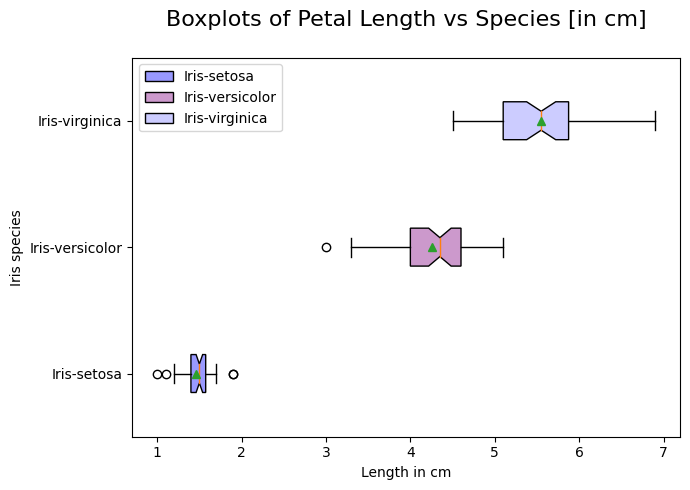

In [20]:
petal_length_in_cm = [dataset[dataset['Species'] == 'Iris-setosa']['PetalLengthCm'], dataset[dataset['Species'] == 'Iris-versicolor']['PetalLengthCm'], dataset[dataset['Species'] == 'Iris-virginica']['PetalLengthCm']]

labels = search_phrases
colors = ['#9999FF', '#CC99CC', '#CCCCFF']

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

bplot = axs.boxplot(
    petal_length_in_cm,
    patch_artist=True,  
    notch=True,        
    showmeans=True,    
    vert=False,        
    labels=labels      
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axs.set_xlabel('Length in cm')
axs.set_ylabel('Iris species')
axs.set_title('Boxplots of Petal Length vs Species [in cm]\n', fontsize=16)

axs.legend(
    [bplot["boxes"][i] for i in range(len(labels))],
    labels, 
    loc='best'
)

plt.tight_layout()

plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

The analysis of petal length for the three iris species reveals clear differences.

**Iris-virginica** has the highest average petal length at **5.552 cm**, compared to **Iris-versicolor** at **4.260 cm** and **Iris-setosa** at **1.464 cm**.

**Range of petal lengths:**

* **Iris-setosa:** 1.0 cm – 1.9 cm
* **Iris-versicolor:** 3.0 cm – 5.1 cm
* **Iris-virginica:** 4.5 cm – 6.9 cm

**Variability:**

**Iris-virginica** has the greatest standard deviation of **0.552 cm**, indicating the highest variability in petal length among the species.
**Iris-versicolor** has a standard deviation of **0.470 cm**, which is lower than that of Iris-virginica but higher than that of Iris-setosa.
**Iris-setosa** has the smallest standard deviation of **0.174 cm**, reflecting the lowest variability.

Additionally, **Iris-setosa** has **3 outlier points** in the petal length distribution, which are more extreme compared to the majority of data points for this species. The minimum value for **Iris-setosa** is **1.0 cm** and the maximum value is **1.9 cm**, with three data points showing unusually low or high petal lengths compared to the general trend.

The minimum and maximum petal lengths for **Iris-virginica** are more extreme compared to the other species. The minimum value of **4.5 cm** and the maximum value of **6.9 cm** for **Iris-virginica** indicate a wider range of petal lengths than in **Iris-versicolor** and are significantly higher than the petal lengths in **Iris-setosa**.

In summary, **Iris-virginica** stands out with the highest average petal length and greatest variability, while **Iris-setosa** has the smallest average petal length and lowest variability, with 3 outlier points in its distribution. **Iris-versicolor** is intermediate in both petal length and variability, with petal lengths falling between those of the other two species.

### PetalWidthCm vs Species

In [21]:
describe_sepal_lenghts_species = dataset.groupby('Species')['PetalWidthCm']
describe_sepal_lenghts_species.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


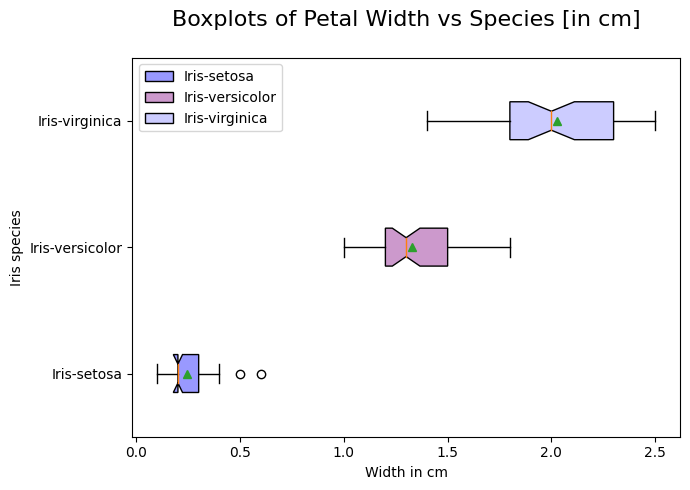

In [22]:
petal_width_in_cm = [dataset[dataset['Species'] == 'Iris-setosa']['PetalWidthCm'], dataset[dataset['Species'] == 'Iris-versicolor']['PetalWidthCm'], dataset[dataset['Species'] == 'Iris-virginica']['PetalWidthCm']]

labels = search_phrases
colors = ['#9999FF', '#CC99CC', '#CCCCFF']

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

bplot = axs.boxplot(
    petal_width_in_cm,
    patch_artist=True,  
    notch=True,        
    showmeans=True,    
    vert=False,        
    labels=labels      
)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axs.set_xlabel('Width in cm')
axs.set_ylabel('Iris species')
axs.set_title('Boxplots of Petal Width vs Species [in cm]\n', fontsize=16)

axs.legend(
    [bplot["boxes"][i] for i in range(len(labels))],
    labels, 
    loc='best'
)

plt.tight_layout()

plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>

The analysis of petal length for the three iris species reveals clear differences.

**Iris-virginica** has the highest average petal length at **2.026 cm**, compared to **Iris-versicolor** at **1.326 cm** and **Iris-setosa** at **0.244 cm**.

**Range of petal lengths:**

* **Iris-setosa:** 0.1 cm – 0.6 cm
* **Iris-versicolor:** 1.0 cm – 1.8 cm
* **Iris-virginica:** 1.4 cm – 2.5 cm

**Variability:**

**Iris-virginica** has the greatest standard deviation of **0.275 cm**, indicating the highest variability in petal length among the species.
**Iris-versicolor** has a standard deviation of **0.198 cm**, which is lower than that of Iris-virginica but higher than that of Iris-setosa.
**Iris-setosa** has the smallest standard deviation of **0.107 cm**, reflecting the lowest variability.

Additionally, on the petal length plot, **Iris-setosa** shows that the minimum value of **0.1 cm** and the 25th percentile of **0.2 cm** are the same, which is visually evident on the plot. Moreover, there are a few **outlier values above** the general distribution for **Iris-setosa**, which extend beyond the typical range of petal lengths for this species.

The petal lengths for **Iris-versicolor** and **Iris-virginica** are higher and more variable compared to **Iris-setosa**. **Iris-virginica** has the widest range of petal lengths, with a minimum of **1.4 cm** and a maximum of **2.5 cm**, compared to **Iris-versicolor**, which ranges from **1.0 cm** to **1.8 cm**.

In summary, **Iris-virginica** stands out with the highest average petal length and greatest variability, while **Iris-setosa** has the smallest average petal length and lowest variability, with a notable visual feature of equal minimum and 25th percentile values and some outlier points. **Iris-versicolor** is intermediate in both petal length and variability, with petal lengths falling between those of the other two species.


<h1 style="text-align: center; color: #0066CC;">ML Models</h1>


### Splitting dataset into feature and label

In [23]:
dataset['Species'].unique() 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

### Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
 
y = label_encoder.fit_transform(y) 

### Splitting dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic regression

### Training the Logistic Regression model on the Training set

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(random_state = 0)
logistic_regression_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting the Test set results

In [28]:
logistic_regression_y_pred = logistic_regression_classifier.predict(X_test)

## K_Nearest Neighbors (K-NN)

### Training the Logistic Regression model on the Training set

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting the Test set results

In [30]:
knn_y_pred = knn_classifier.predict(X_test)

## Suport Vector Machine (SVM)

### Training the Logistic Regression model on the Training set

In [31]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predicting the Test set results

In [32]:
svm_y_pred = svm_classifier.predict(X_test)

## Kernel SVM

### Training the Logistic Regression model on the Training set

In [33]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

### Predicting the Test set results

In [34]:
kernel_svm_y_pred = kernel_svm_classifier.predict(X_test)

## Naive Bayes

### Training the Logistic Regression model on the Training set

In [35]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

### Predicting the Test set results

In [36]:
naive_bayes_classifier_y_pred = naive_bayes_classifier.predict(X_test)

## Decision Tree

### Training the Logistic Regression model on the Training set

In [37]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Predicting the Test set results

In [38]:
decision_tree_y_pred = decision_tree_classifier.predict(X_test)

## Random forest classification

### Training the Logistic Regression model on the Training set

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classification = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_classification.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### Predicting the Test set results

In [40]:
random_forest_classification_y_pred = random_forest_classification.predict(X_test)

<h1 style="text-align: center; color: #0066CC;">Model metrics</h1>


In [41]:
classification_models = ['Logistic regression', 'K-NN','SVM','Naive Bayes','Decision Tree','Random forest classification']
y_pred_list = [logistic_regression_y_pred, knn_y_pred, svm_y_pred, naive_bayes_classifier_y_pred, decision_tree_y_pred, random_forest_classification_y_pred]

## Accuracy scores

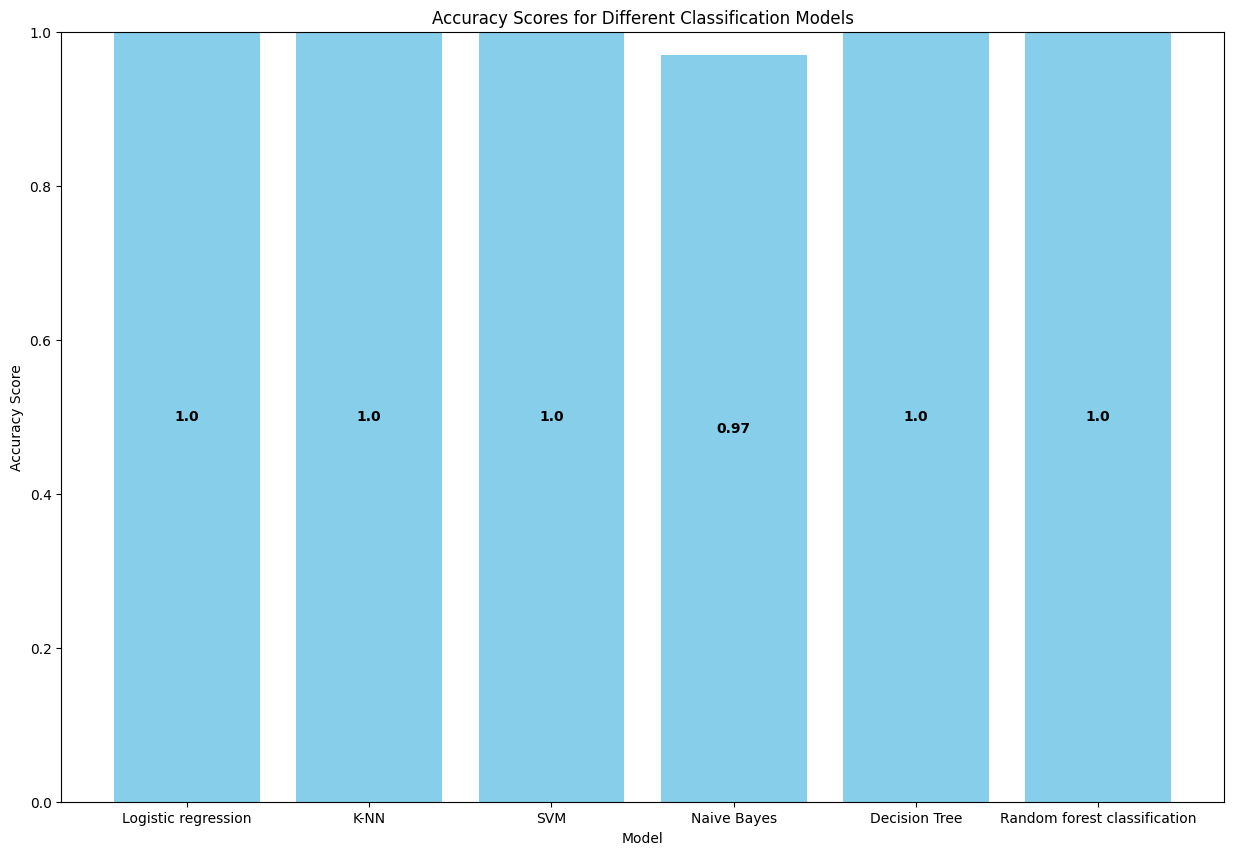

In [42]:
from sklearn.metrics import accuracy_score
accuracy_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classification Models')
plt.ylim(0, 1)

for bar, acc_score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{acc_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## Precision scores

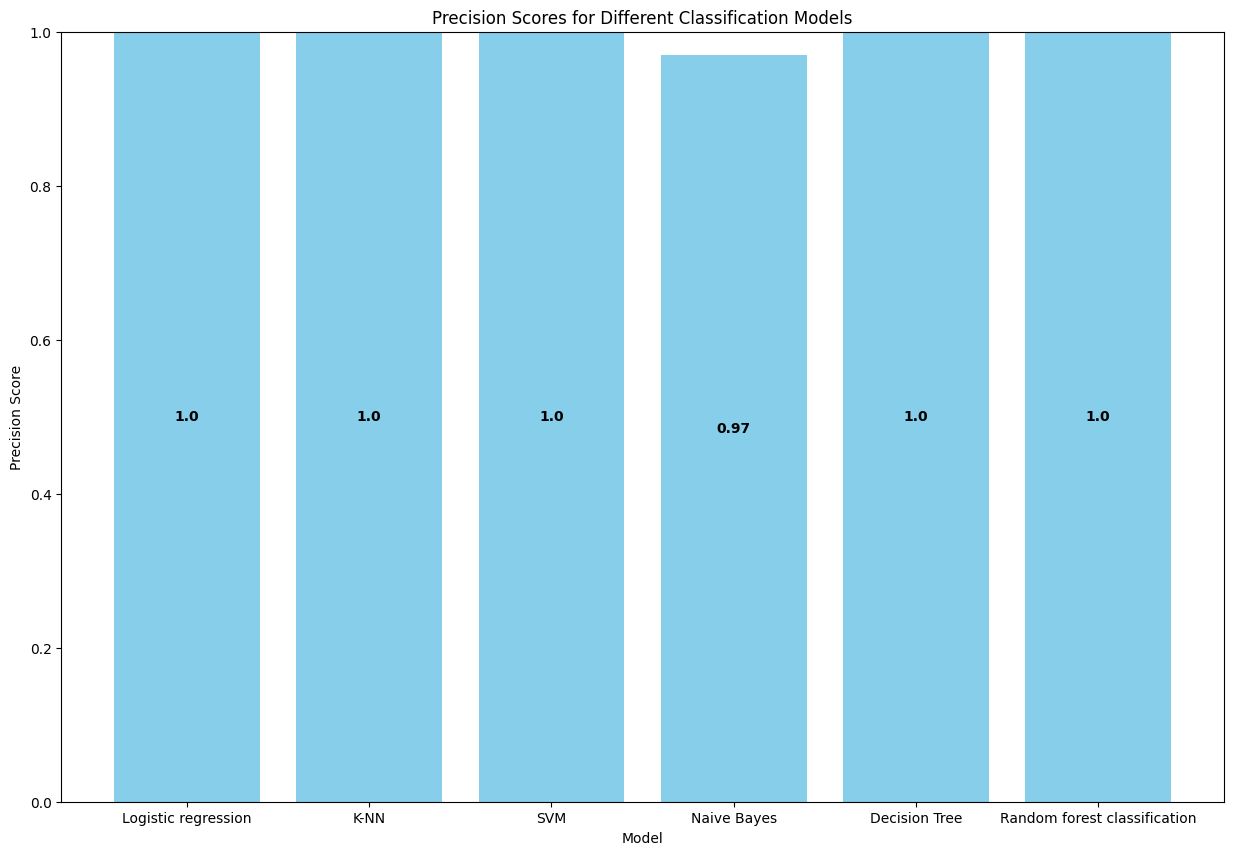

In [43]:
from sklearn.metrics import precision_score
precision_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    precision = round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    precision_scores.append(precision)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, precision_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Different Classification Models')
plt.ylim(0, 1)

for bar, prec_score in zip(bars, precision_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{prec_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## Recall scores

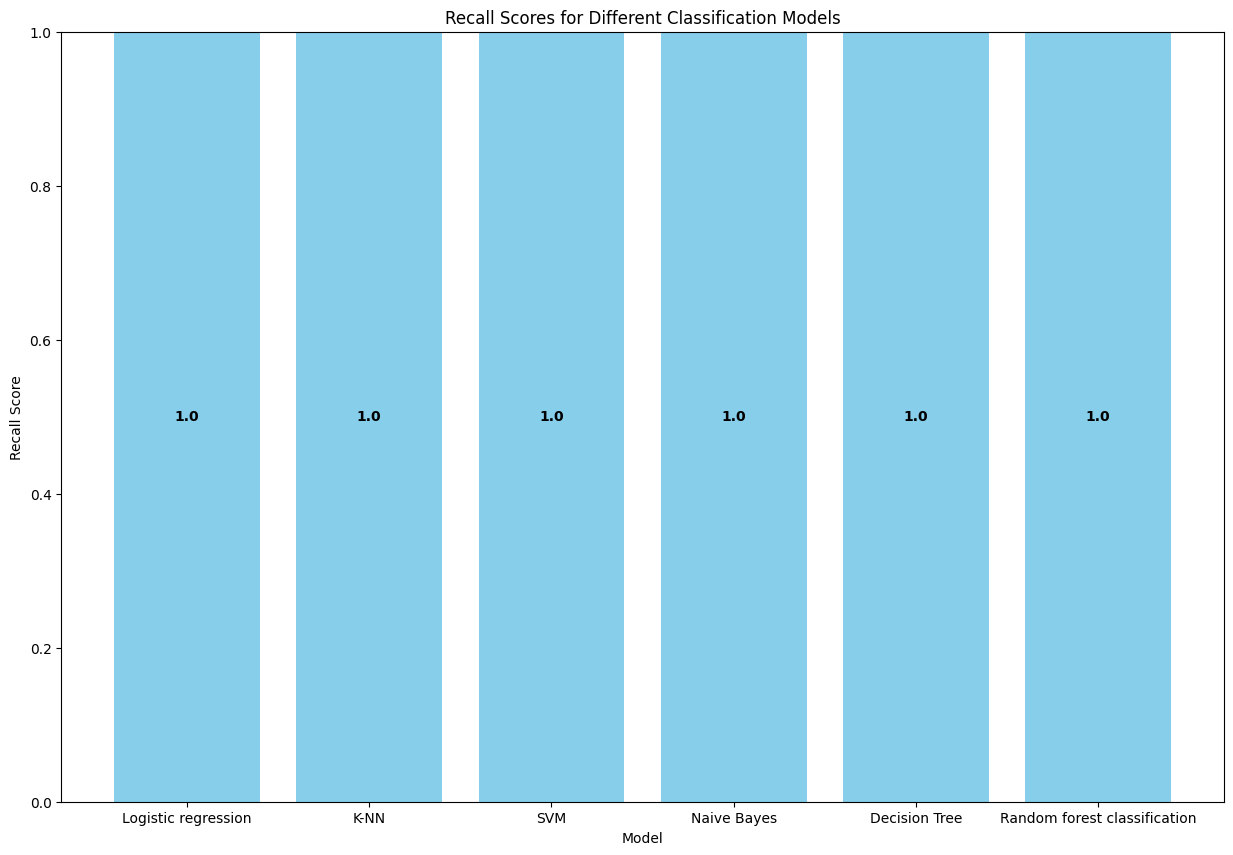

In [44]:
from sklearn.metrics import recall_score

recall_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    recall = round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    recall_scores.append(precision)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, recall_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Recall Scores for Different Classification Models')
plt.ylim(0, 1)

for bar, rec_score in zip(bars, recall_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{rec_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## F1 scores

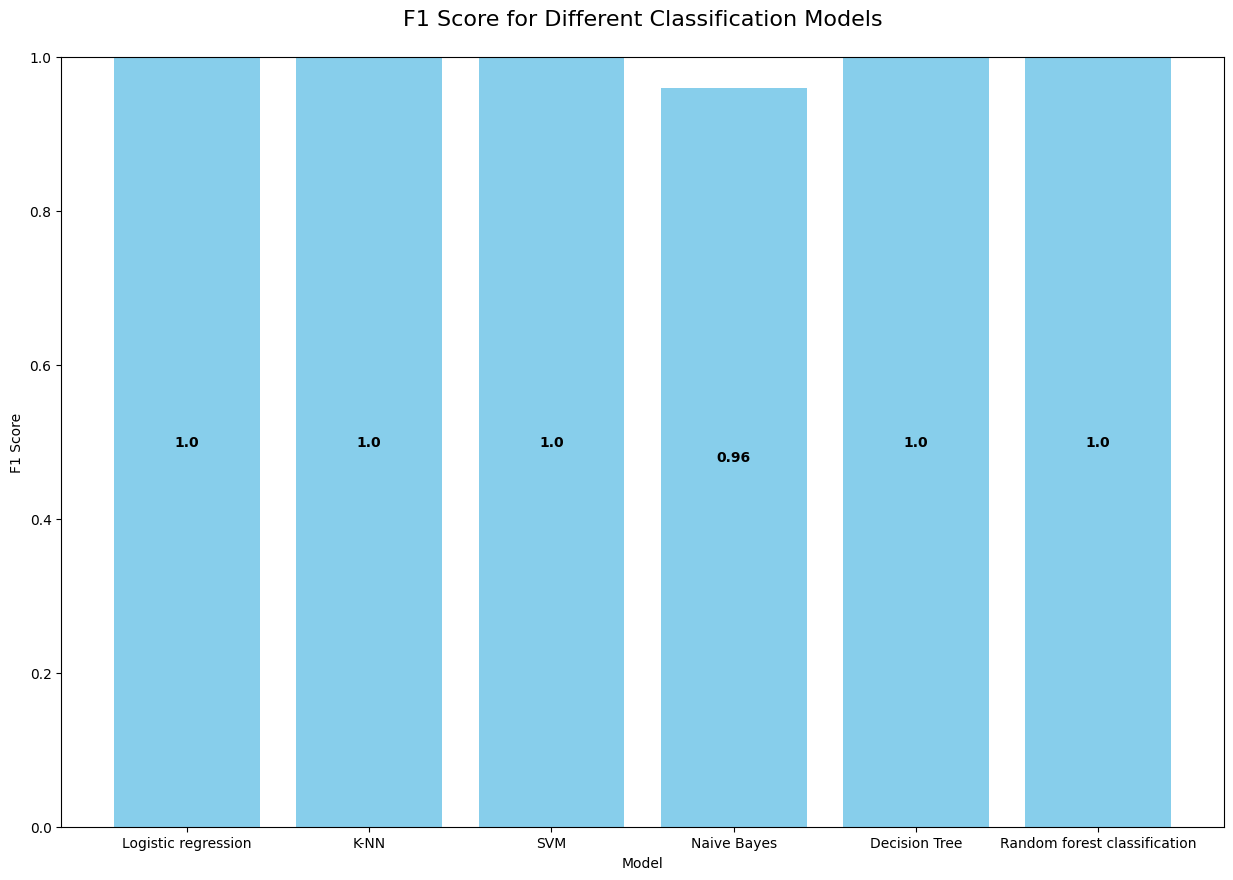

In [45]:
from sklearn.metrics import f1_score

classification_models = ['Logistic regression', 'K-NN','SVM','Naive Bayes','Decision Tree','Random forest classification']
y_pred_list = [logistic_regression_y_pred, knn_y_pred, svm_y_pred, naive_bayes_classifier_y_pred, decision_tree_y_pred, random_forest_classification_y_pred]

f1_scores = []

for model_name, y_pred in zip(classification_models, y_pred_list):
    f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
    f1_scores.append(f1)

plt.figure(figsize=(15, 10))
bars = plt.bar(classification_models, f1_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Classification Models\n', fontsize=16)
plt.ylim(0, 1)

for bar, f1_score in zip(bars, f1_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{f1_score}', ha='center', va='center', color='black', fontweight='bold')

plt.show()

## Confusion matrix

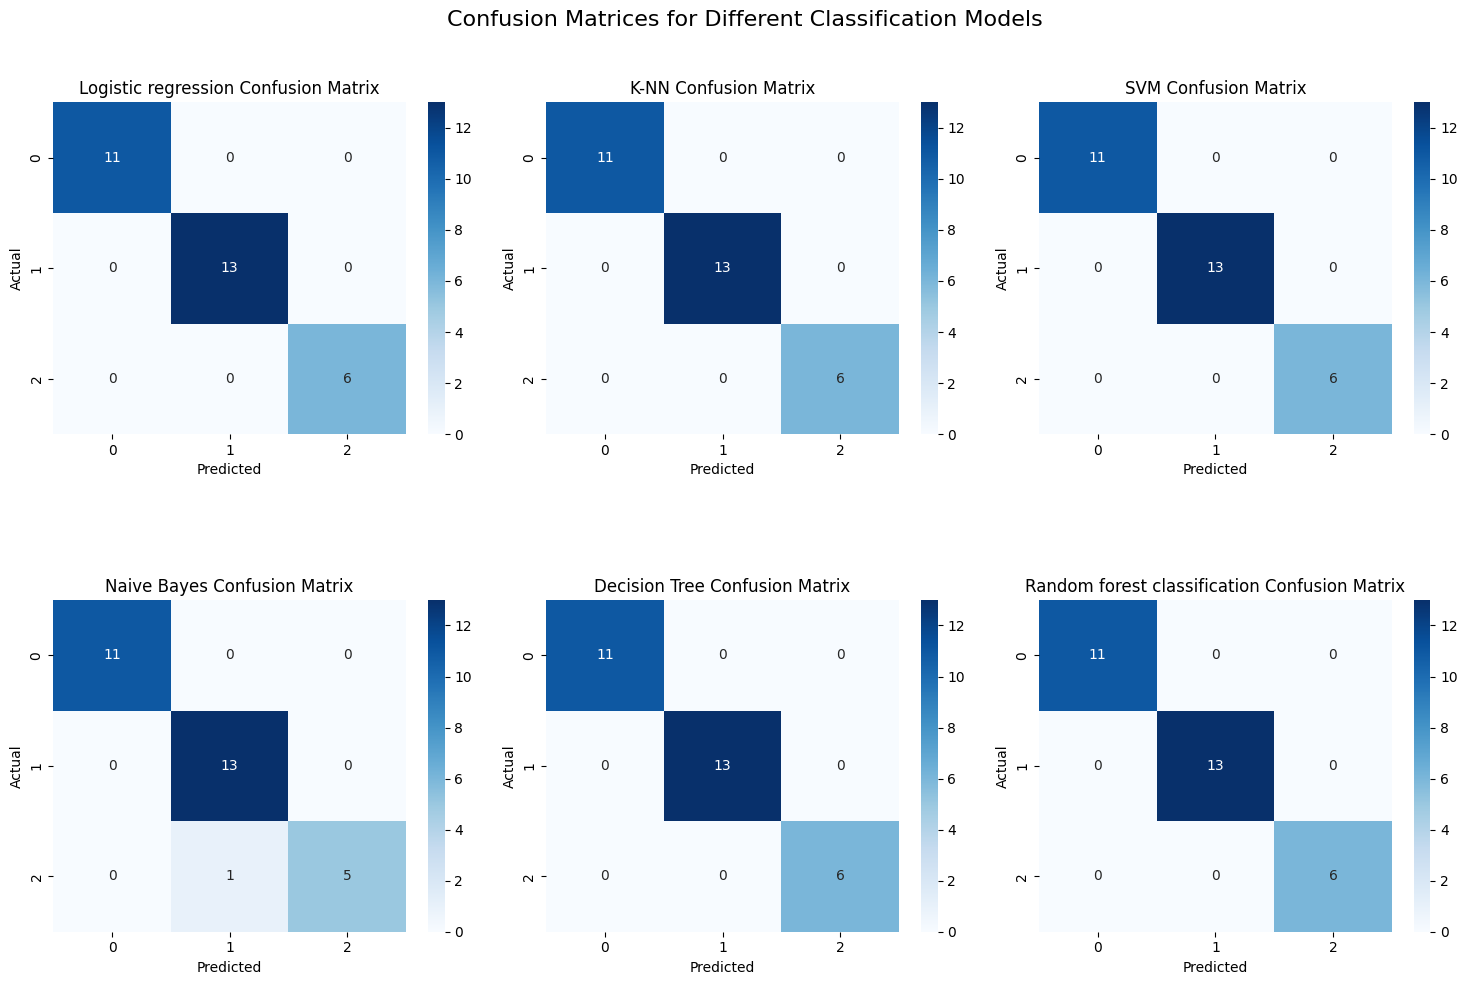

In [46]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for ax, model_name, y_pred in zip(axes, classification_models, y_pred_list):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig.suptitle('Confusion Matrices for Different Classification Models', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.subplots_adjust(hspace=0.5)
plt.show()

<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>


Based on the accuracy score and precision score, we can see that **all models achieve nearly 100% accuracy**. The only **exception is the Naive Bayes model, which has an accuracy score and precision of 0.97**. For the **recall score, all models exhibit a perfect 100% match**. However, when we look at the **F1 score, the Naive Bayes model again shows a slightly lower value (0.97) compared to the other models, which all have an F1 score of 1.0**.

The confusion matrix explains why the Naive Bayes model has lower metrics. While the actual and predicted values align perfectly across all models, the Naive Bayes model makes one error. Specifically, the actual value is 2, but the predicted value is 1. This indicates that the Naive Bayes model incorrectly classified one observation of Iris-virginica as Iris-versicolor.

## k-fold Cross-Validation

In [47]:
from sklearn.model_selection import cross_val_score

models_classifier = [logistic_regression_classifier, knn_classifier, svm_classifier, naive_bayes_classifier, decision_tree_classifier, random_forest_classification]
accuracy_kfold = []
std_kfold = []

for model_name, classifier in zip(classification_models, models_classifier): 
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
    mean_accuracy = accuracies.mean() * 100
    std_accuracy = accuracies.std() * 100
    accuracy_kfold.append(f"{mean_accuracy:.2f}%")
    std_kfold.append(f"{std_accuracy:.2f}%")
    
kfold_df = pd.DataFrame({
    'Model': classification_models,
    'Accuracy (%)': accuracy_kfold,
    'Std Dev (%)': std_kfold
})

print(kfold_df)

                          Model Accuracy (%) Std Dev (%)
0           Logistic regression       95.00%       5.53%
1                          K-NN       93.33%       6.24%
2                           SVM       94.17%       6.51%
3                   Naive Bayes       95.00%       5.53%
4                 Decision Tree       93.33%       5.00%
5  Random forest classification       94.17%       5.34%


<h3 style="text-align: center; color: #0066CC;">Insights and Conclusions</h3>


Logistic Regression and Naive Bayes achieved the highest accuracy of 95%, indicating that these models are very effective for this classification task. KNN and Decision Tree had the lowest accuracy at 93.33%, suggesting that their performance is slightly worse compared to the other models tested. Both Logistic Regression and Naive Bayes also have the lowest standard deviation of 5.53%, which shows less fluctuation in their performance across different data splits. SVM and Random Forest attained an accuracy of 94.17%, placing them in between the best and worst models in terms of overall effectiveness. KNN has the highest standard deviation at 6.24%, which indicates that its performance may be more variable depending on the data splits.

Overall, **Logistic Regression and Naive Bayes provide the highest accuracy** with the smallest variation in results, making them the most reliable and effective models for this task.


<h2 style="text-align: center; color: #0066CC;">Considering the remaining metrics (accuracy, recall, F1 score, and precision) along with k-fold cross-validation, the best model for the given problem will be the Logistic Regression model.</h2>
